<a href="https://colab.research.google.com/github/joshIsac/YoutubeDataAnalytics/blob/main/Data_analytics_on_YouTube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#social media analytics on youtube
!pip install google-api-python-client


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import googleapiclient.discovery
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

In [51]:
import os

#defining path of the api
api_key_path='/content/drive/MyDrive/api_key.txt'
api_key=open(api_key_path,'r').read()


In [52]:
youtube=build('youtube','v3',developerKey=api_key)
def get_channel_stats(youtube,channel_id):
  request=youtube.channels().list(part='snippet,statistics',id=channel_id)
  response=request.execute()
  data=pd.DataFrame(response['items'])
  return data



In [53]:
get_channel_stats(youtube,'UCMiJRAwDNSNzuYeN2uWa0pA')

,kind,etag,id,snippet,statistics
0,youtube#channel,ku57dW0mw3AQUEkOkwBgR0GfA1c,UCMiJRAwDNSNzuYeN2uWa0pA,"{'title': 'Mrwhosetheboss', 'description': 'Le...","{'viewCount': '5787861999', 'subscriberCount':..."


In [54]:
#getting the best video comments in plain text
def get_video_comments(video_id):
  comments = []
  request=youtube.commentThreads().list(part='snippet',videoId=video_id)
  response=request.execute()
  data=pd.DataFrame(response['items'])
  for item in response['items']:

    comment=item['snippet']['topLevelComment']['snippet']['textDisplay']
    comments.append(comment)
  return comments

In [55]:
#getting top 25 comments
comments=get_video_comments('KLWdtl5S51g')
comments[:25]

['Have you been tempted to use a folding phone? 🤓<br>For one of my favourite videos about my best tech purchases ever: <a href="https://www.youtube.com/watch?v=48vET0WDkqc">https://youtu.be/48vET0WDkqc</a><br>Download the new version of Opera Browser for free <a href="https://opr.as/Opera-browser-Arun-Zflip">https://opr.as/Opera-browser-Arun-Zflip</a>',
 'the just keep it unfolded',
 'This man just made the largest upgrade in history',
 'Android? No thanks',
 'I tried switching from android to iphone and the migration was just as messy and annoying',
 'The thumbnail is really clever',
 'Ye I’m still a Apple user',
 'Of course, the ecosystem from Android to Apple devices is bad, all named things work perfectly on Windows computers. As an example, Samsung&#39;s Galaxy Books come with Quick Share or other Samsung mobile apps on PC...',
 'So basically, if you&#39;re personally absorbed into the Apple eco system, you&#39;re sorta trapped because you spent tons of money on building your ecos

In [56]:
data=pd.DataFrame(comments,columns=['comments'])
data.head(25)

,comments
0,Have you been tempted to use a folding phone? ...
1,the just keep it unfolded
2,This man just made the largest upgrade in history
3,Android? No thanks
4,I tried switching from android to iphone and t...
5,The thumbnail is really clever
6,Ye I’m still a Apple user
7,"Of course, the ecosystem from Android to Apple..."
8,"So basically, if you&#39;re personally absorbe..."
9,Thank you for this! Couldn’t decide to switch ...


In [57]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
#remove url
def remove_url(text):
  url_pattern=re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'',text)

#Text to lower
def to_lower(text):
  return text.lower()

#remove punctuation
def remove_punc(text):
  translator=str.maketrans('','',string.punctuation)
  return text.translate(translator)

#remove stopwords
def remove_stopwords(text):
  stop_words=set(stopwords.words('english'))
  words=text.split()
  filtered_words=[word for word in words if word not in stop_words]
  return ' '.join(filtered_words)

#remove numbers
def remove_numbers(text):
  return re.sub(r'\d+', '', text)

# Lemmatize text
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

#remove symbols
def remove_symbols(text):
  return re.sub(r'[^\w\s]', '', text)


In [59]:
def preprocess_text(text):
  text=remove_url(text)
  text=to_lower(text)
  text=remove_punc(text)
  text=remove_stopwords(text)
  text=remove_numbers(text)
  text=lemmatize_text(text)
  text=remove_symbols(text)
  return text

#calling the funtion preprocess
data['comments']=data['comments'].apply(preprocess_text)
data.head(25)

,comments
0,tempted use folding phone brfor one favourite ...
1,keep unfolded
2,man made largest upgrade history
3,android thanks
4,tried switching android iphone migration messy...
5,thumbnail really clever
6,ye im still apple user
7,course ecosystem android apple device bad name...
8,basically youre personally absorbed apple eco ...
9,thank couldnt decide switch many apple product...


In [60]:
#show the comments after preprocessing in df
data['Cleaned_Comments']=data['comments'].apply(remove_url).apply(to_lower).apply(remove_punc).apply(remove_stopwords).apply(remove_numbers).apply(lemmatize_text)
data.head(25)

,comments,Cleaned_Comments
0,tempted use folding phone brfor one favourite ...,tempted use folding phone brfor one favourite ...
1,keep unfolded,keep unfolded
2,man made largest upgrade history,man made largest upgrade history
3,android thanks,android thanks
4,tried switching android iphone migration messy...,tried switching android iphone migration messy...
5,thumbnail really clever,thumbnail really clever
6,ye im still apple user,ye im still apple user
7,course ecosystem android apple device bad name...,course ecosystem android apple device bad name...
8,basically youre personally absorbed apple eco ...,basically youre personally absorbed apple eco ...
9,thank couldnt decide switch many apple product...,thank couldnt decide switch many apple product...


In [61]:
#Sentiment analysis
!pip install textblob
from textblob import TextBlob

In [62]:
def get_sentiment(text):
  blob=TextBlob(text)
  return blob.sentiment.polarity

data['Sentiment_polarity']=data['comments'].apply(get_sentiment)


data[['comments','Cleaned_Comments','Sentiment_polarity']].head(25)



,comments,Cleaned_Comments,Sentiment_polarity
0,tempted use folding phone brfor one favourite ...,tempted use folding phone brfor one favourite ...,0.512121
1,keep unfolded,keep unfolded,0.000000
2,man made largest upgrade history,man made largest upgrade history,0.000000
3,android thanks,android thanks,0.200000
4,tried switching android iphone migration messy...,tried switching android iphone migration messy...,-0.500000
5,thumbnail really clever,thumbnail really clever,0.166667
6,ye im still apple user,ye im still apple user,0.000000
7,course ecosystem android apple device bad name...,course ecosystem android apple device bad name...,0.211111
8,basically youre personally absorbed apple eco ...,basically youre personally absorbed apple eco ...,0.212500
9,thank couldnt decide switch many apple product...,thank couldnt decide switch many apple product...,0.000000


In [63]:
#counting sentiment
def categorize_sentiment(polarity):
  if polarity>0:
    return 'Positive'
  elif polarity==0:
    return 'Neutral'
  else:
    return 'Negative'

data['Sentiment_categories']=data['Sentiment_polarity'].apply(categorize_sentiment)

data[['comments','Cleaned_Comments','Sentiment_polarity','Sentiment_categories']].head(25)

,comments,Cleaned_Comments,Sentiment_polarity,Sentiment_categories
0,tempted use folding phone brfor one favourite ...,tempted use folding phone brfor one favourite ...,0.512121,Positive
1,keep unfolded,keep unfolded,0.000000,Neutral
2,man made largest upgrade history,man made largest upgrade history,0.000000,Neutral
3,android thanks,android thanks,0.200000,Positive
4,tried switching android iphone migration messy...,tried switching android iphone migration messy...,-0.500000,Negative
5,thumbnail really clever,thumbnail really clever,0.166667,Positive
6,ye im still apple user,ye im still apple user,0.000000,Neutral
7,course ecosystem android apple device bad name...,course ecosystem android apple device bad name...,0.211111,Positive
8,basically youre personally absorbed apple eco ...,basically youre personally absorbed apple eco ...,0.212500,Positive
9,thank couldnt decide switch many apple product...,thank couldnt decide switch many apple product...,0.000000,Neutral


In [64]:
def get_subjectivity(text):
  blob = TextBlob(text)
  return blob.sentiment.subjectivity

data['Sentiment_subjectivity'] = data['comments'].apply(get_subjectivity)

# Assuming you want to display polarity and subjectivity together
data[['comments', 'Cleaned_Comments', 'Sentiment_polarity', 'Sentiment_subjectivity']].head()


,comments,Cleaned_Comments,Sentiment_polarity,Sentiment_subjectivity
0,tempted use folding phone brfor one favourite ...,tempted use folding phone brfor one favourite ...,0.512121,0.518182
1,keep unfolded,keep unfolded,0.000000,0.000000
2,man made largest upgrade history,man made largest upgrade history,0.000000,0.000000
3,android thanks,android thanks,0.200000,0.200000
4,tried switching android iphone migration messy...,tried switching android iphone migration messy...,-0.500000,0.650000


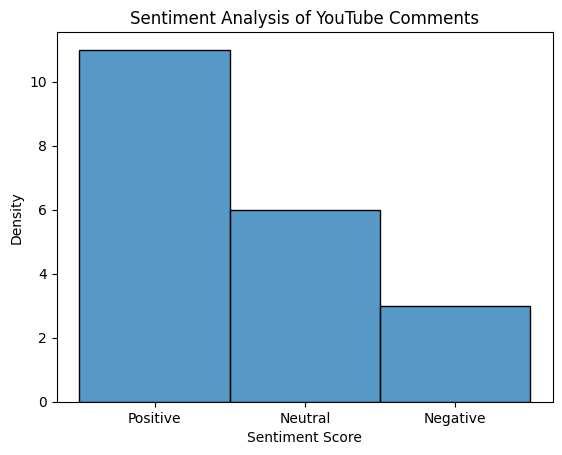

In [65]:
import matplotlib.pyplot as plt
import seaborn as sn

# Sentiment distribution plot
sn.histplot(data['Sentiment_categories'], bins=20)
plt.title('Sentiment Analysis of YouTube Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()


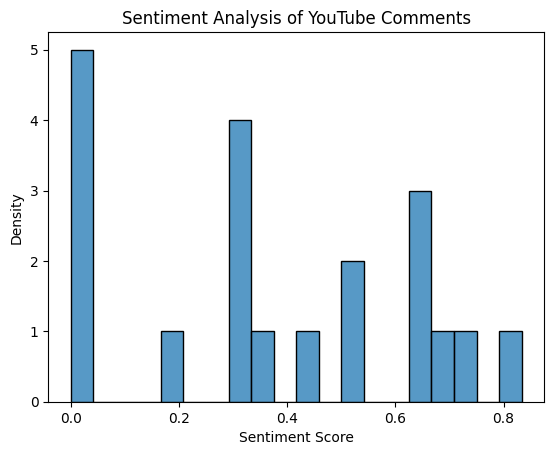

In [66]:
#plot Sentiment Subjectivity
sn.histplot(data['Sentiment_subjectivity'], bins=20)
plt.title('Sentiment Analysis of YouTube Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()


In [67]:
#accuracy score of Predicting how well the model is trained
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(data['Sentiment_categories'],data['Sentiment_categories'])
print('Accuracy:',accuracy)

Accuracy: 1.0


In [68]:
# Calculate and print the correlation between 'Sentiment_subjectivity' and 'Sentiment_polarity'
correlation = data['Sentiment_subjectivity'].corr(data['Sentiment_polarity'])
print('Correlation between Subjectivity and Polarity:', correlation)

Correlation between Subjectivity and Polarity: 0.007540741530751527


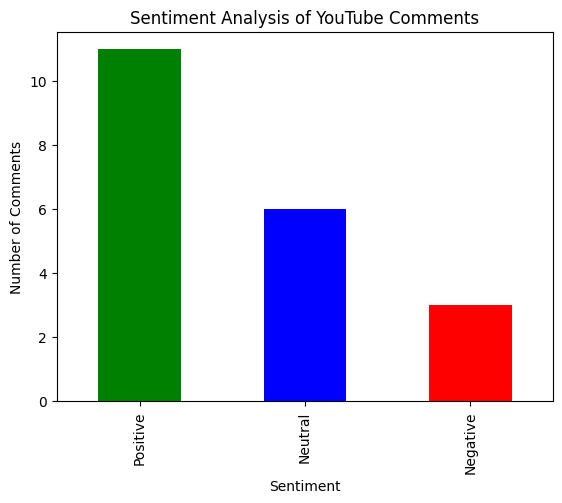

In [69]:
# Visualizing the sentiment distribution
import matplotlib.pyplot as plt

sentiment_counts = data['Sentiment_categories'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of YouTube Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()


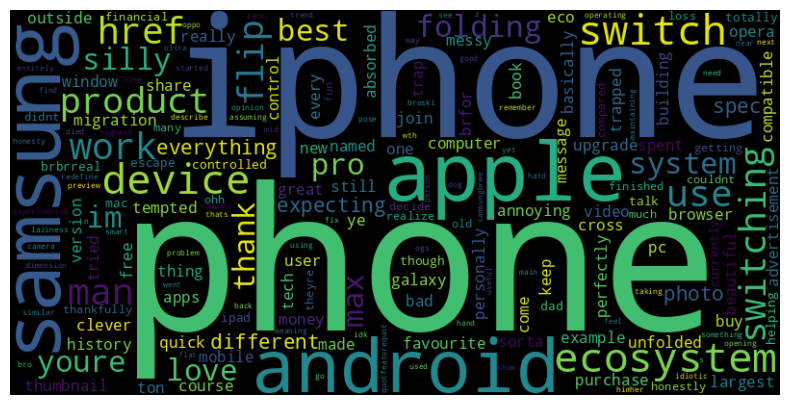

In [70]:
# Wordcloud of comments
from wordcloud import WordCloud

# Combine all comments into a single string
all_comments = ' '.join(data['comments'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_comments)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [99]:


!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
  scores = analyzer.polarity_scores(text)
  return scores['compound']  # Use compound score for overall sentiment

data['Vader_Sentiment'] = data['comments'].apply(get_vader_sentiment)

# Display results
data[['comments', 'Cleaned_Comments', 'Sentiment_polarity', 'Vader_Sentiment']].head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.0 MB/s eta 0:00:00


,comments,Cleaned_Comments,Sentiment_polarity,Vader_Sentiment
0,tempted use folding phone brfor one favourite ...,tempted use folding phone brfor one favourite ...,0.512121,0.8176
1,keep unfolded,keep unfolded,0.000000,0.0000
2,man made largest upgrade history,man made largest upgrade history,0.000000,0.0000
3,android thanks,android thanks,0.200000,0.4404
4,tried switching android iphone migration messy...,tried switching android iphone migration messy...,-0.500000,-0.6369


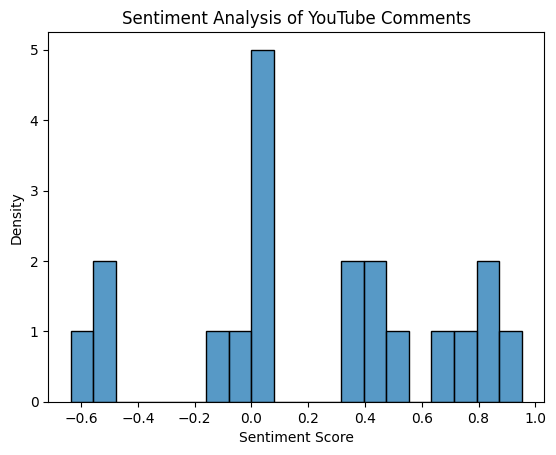

In [111]:
#plotting Vader
sn.histplot(data['Vader_Sentiment'], bins=20)
plt.title('Sentiment Analysis of YouTube Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

Text(0, 0.5, 'Number of Comments')

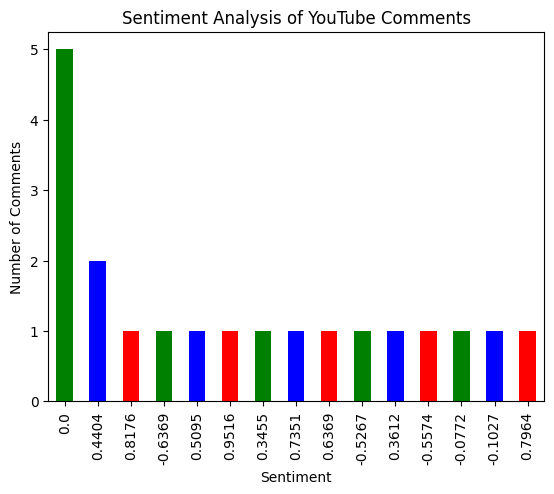

In [112]:
#Plotting of bar plot
sentiment_counts = data['Vader_Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of YouTube Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')

In [113]:

# Model 3: Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare data
X = data['Cleaned_Comments']
y = data['Sentiment_categories']

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict sentiment on test data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:', accuracy)

#display results for logistic regression
data['Logistic_Regression_Sentiment'] = model.predict(vectorizer.transform(data['Cleaned_Comments']))
data[['comments', 'Cleaned_Comments', 'Sentiment_polarity', 'Vader_Sentiment', 'Logistic_Regression_Sentiment']].head()

Logistic Regression Accuracy: 0.5


,comments,Cleaned_Comments,Sentiment_polarity,Vader_Sentiment,Logistic_Regression_Sentiment
0,tempted use folding phone brfor one favourite ...,tempted use folding phone brfor one favourite ...,0.512121,0.8176,Positive
1,keep unfolded,keep unfolded,0.000000,0.0000,Positive
2,man made largest upgrade history,man made largest upgrade history,0.000000,0.0000,Neutral
3,android thanks,android thanks,0.200000,0.4404,Positive
4,tried switching android iphone migration messy...,tried switching android iphone migration messy...,-0.500000,-0.6369,Positive


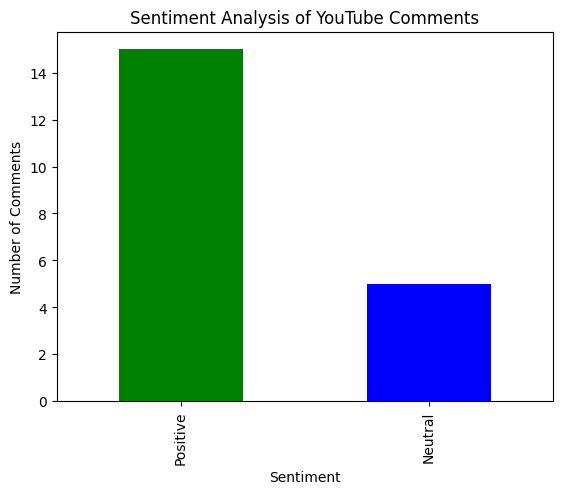

In [115]:
#plotting of the Logistic regression using bar plor
sentiment_counts = data['Logistic_Regression_Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of YouTube Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

In [116]:
from transformers import pipeline

# Load a pre-trained sentiment analysis pipeline
transformer_analyzer = pipeline("sentiment-analysis")

def get_transformer_sentiment(text):
    result = transformer_analyzer(text)[0]
    return result['label']  # e.g., 'POSITIVE' or 'NEGATIVE'

data['Transformer_Sentiment'] = data['comments'].apply(get_transformer_sentiment)

#display Results
data[['comments', 'Cleaned_Comments','Transformer_Sentiment']].head()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,comments,Cleaned_Comments,Transformer_Sentiment
0,tempted use folding phone brfor one favourite ...,tempted use folding phone brfor one favourite ...,NEGATIVE
1,keep unfolded,keep unfolded,POSITIVE
2,man made largest upgrade history,man made largest upgrade history,POSITIVE
3,android thanks,android thanks,POSITIVE
4,tried switching android iphone migration messy...,tried switching android iphone migration messy...,NEGATIVE


In [122]:
!pip install nltk
from nltk.corpus import sentiwordnet as swn
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('sentiwordnet')
nltk.download('punkt')
nltk.download('stopwords')

def get_sentiwordnet_sentiment(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

    sentiment_score = 0
    num_tokens = 0

    for token in tokens:
        synsets = list(swn.senti_synsets(token))
        if synsets:
            # Get the first synset
            synset = synsets[0]
            sentiment_score += synset.pos_score() - synset.neg_score()
            num_tokens += 1

    if num_tokens > 0:
        return sentiment_score / num_tokens
    else:
        return 0

data['SentiWordNet_Sentiment'] = data['comments'].apply(get_sentiwordnet_sentiment)

# Display results
data[['comments', 'Cleaned_Comments', 'SentiWordNet_Sentiment']].head()


[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,comments,Cleaned_Comments,SentiWordNet_Sentiment
0,tempted use folding phone brfor one favourite ...,tempted use folding phone brfor one favourite ...,0.015625
1,keep unfolded,keep unfolded,0.062500
2,man made largest upgrade history,man made largest upgrade history,0.025000
3,android thanks,android thanks,0.062500
4,tried switching android iphone migration messy...,tried switching android iphone migration messy...,-0.187500


In [124]:
#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import pandas as pd


# Convert it to a DataFrame
train_data = pd.DataFrame(train_data, columns=['comments', 'sentiments'])

# Extract sentiment labels (assuming 'positive', 'negative', 'neutral' are the possible sentiments)
def extract_sentiment(sentiment_dict):
    if sentiment_dict['cats']['positive'] == 1:
        return 'positive'
    elif sentiment_dict['cats']['negative'] == 1:
        return 'negative'
    else:
        return 'neutral'

train_data['sentiment_label'] = train_data['sentiments'].apply(extract_sentiment)

# Create a pipeline that first converts text to features and then applies Naive Bayes
model = make_pipeline(CountVectorizer(), MultinomialNB())
# Fit the model using the extracted sentiment labels
model.fit(train_data['comments'], train_data['sentiment_label'])

def get_naive_bayes_sentiment(text):
    return model.predict([text])[0]

data['NaiveBayes_Sentiment'] = data['comments'].apply(get_naive_bayes_sentiment)

# Display results
data[['comments', 'Cleaned_Comments', 'NaiveBayes_Sentiment']].head()

,comments,Cleaned_Comments,NaiveBayes_Sentiment
0,tempted use folding phone brfor one favourite ...,tempted use folding phone brfor one favourite ...,positive
1,keep unfolded,keep unfolded,negative
2,man made largest upgrade history,man made largest upgrade history,negative
3,android thanks,android thanks,negative
4,tried switching android iphone migration messy...,tried switching android iphone migration messy...,negative


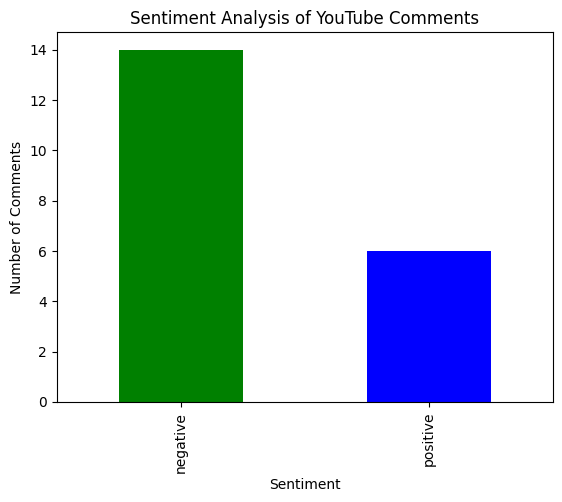

In [125]:
#plotting of the Naive Bayes using bar plor
sentiment_counts = data['NaiveBayes_Sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of YouTube Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

In [71]:
# @title Data Analytics on YOUTUBE
#getting the video details
def get_video_details(video_id):
  request = youtube.videos().list(part="snippet,contentDetails,statistics",id=video_id
    )
  response = request.execute()

  return response

video_id = 'KLWdtl5S51g'  # Replace with your video ID
video_details = get_video_details(video_id)
video_details

{'kind': 'youtube#videoListResponse',
 'etag': 'VS9C8BARmHngalN3SiOfvk0FHV8',
 'items': [{'kind': 'youtube#video',
   'etag': 'dalqPCYJxurkSe5Cy5huGiHOyic',
   'id': 'KLWdtl5S51g',
   'snippet': {'publishedAt': '2023-09-01T09:49:36Z',
    'channelId': 'UCMiJRAwDNSNzuYeN2uWa0pA',
    'title': 'I tried switching from iPhone to Samsung',
    'description': "I switched from iPhone 14 Pro Max to the Samsung Z Flip 5 - I thought it was going to be amazing...but was it?  Download the new version of Opera Browser for free https://opr.as/Opera-browser-Arun-Zflip\n\nI spend a LOT of time trying to make my videos as concise, polished and useful as possible for you - if you would like to support me on that mission then consider subscribing to the channel - you'd make my day 😁\n\nFor my tech hot takes: http://twitter.com/Mrwhosetheboss\nFor my Personal Posts: http://instagram.com/mrwhosetheboss\nDoes anyone still use this anymore?: https://facebook.com/mrwhosetheboss\n\nAmazon Affiliate links (if y

In [72]:
#getting the meta data
def youtube_metadata(video_id):
  request = youtube.videos().list(part="snippet,contentDetails,statistics",id=video_id)
  response = request.execute()

  for video in response['items']:
    metadata={
        'Title':video['snippet']['title'],
        'Description':video['snippet']['description'],
        'Published At':video['snippet']['publishedAt'],
        'View Count':video['statistics']['viewCount'],
        'Like Count':video['statistics']['likeCount'],
        'Comment Count':video['statistics']['commentCount'],
        'Tags':video['snippet'].get('tags',[]),
        'Duration':video['contentDetails']['duration'],
        'Definition':video['contentDetails']['definition'],
        'Caption Status':video['contentDetails']['caption']

    }
  return metadata


video_id = 'KLWdtl5S51g'  # Replace with your video ID
metadata = youtube_metadata(video_id)
metadata


{'Title': 'I tried switching from iPhone to Samsung',
 'Description': "I switched from iPhone 14 Pro Max to the Samsung Z Flip 5 - I thought it was going to be amazing...but was it?  Download the new version of Opera Browser for free https://opr.as/Opera-browser-Arun-Zflip\n\nI spend a LOT of time trying to make my videos as concise, polished and useful as possible for you - if you would like to support me on that mission then consider subscribing to the channel - you'd make my day 😁\n\nFor my tech hot takes: http://twitter.com/Mrwhosetheboss\nFor my Personal Posts: http://instagram.com/mrwhosetheboss\nDoes anyone still use this anymore?: https://facebook.com/mrwhosetheboss\n\nAmazon Affiliate links (if you buy anything through these it will support the channel and allow us to buy better gear!):\nAmazon US: https://amzn.to/3mFix9d\nAmazon UK: https://amzn.to/3GMPPtM\n\nMy Filming Gear:\nhttps://bit.ly/35CuxwI\n\nMusic is from Epidemic sound:\nhttp://share.epidemicsound.com/pHDFT",
 'Pu

In [73]:
# top 5  get trending videos from the above channel

def get_trending_videos(youtube, channel_id, max_results=5):
  request = youtube.search().list(
      part="snippet",
      channelId=channel_id,
      maxResults=max_results,
      order="viewCount",
      type="video"
  )
  response = request.execute()

  trending_videos = []
  for item in response['items']:
    video_id = item['id']['videoId']
    video_title = item['snippet']['title']
    trending_videos.append((video_id, video_title))

  return trending_videos

channel_id = 'UCMiJRAwDNSNzuYeN2uWa0pA'
trending_videos = get_trending_videos(youtube, channel_id)

print("Top 5 Trending Videos:")
for video_id, video_title in trending_videos:
  print(f"Video ID: {video_id}, Title: {video_title}")


Top 5 Trending Videos:
Video ID: qmQ6QwG1b0Q, Title: The BRIGHTEST TORCH in the World!
Video ID: uOrENBYWQOU, Title: This Gadget can SAVE a BILLION lives 🤭
Video ID: nSDrrKtqISo, Title: 6 CREEPIEST iPhone Cases!
Video ID: 1Nef8LPO-jo, Title: 5 ILLEGAL gadgets that will get you ARRESTED
Video ID: S1FkabHFtoY, Title: 6 Undercover AirPods Cases 😎


<ipython-input-74-77e93cee0972>:25: UserWarning: Glyph 129325 (\N{SMILING FACE WITH SMILING EYES AND HAND COVERING MOUTH}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129325 (\N{SMILING FACE WITH SMILING EYES AND HAND COVERING MOUTH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


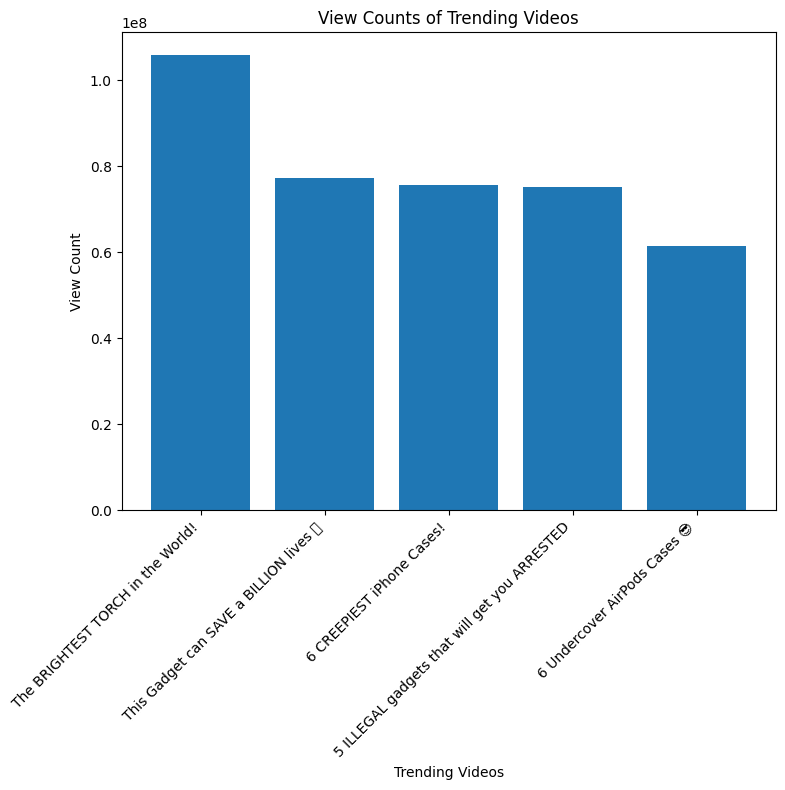

In [74]:
 #plot views count of the above trending Videos

# list of video details for trending videos
trending_video_details = [get_video_details(video_id) for video_id, _ in trending_videos]

# Extract view counts and engagement rates
view_counts = []
engagement_rates = []
for video in trending_video_details:
  stats = video['items'][0]['statistics']
  view_count = int(stats['viewCount'])
  like_count = int(stats.get('likeCount', 0))
  comment_count = int(stats.get('commentCount', 0))
  engagement_rate = (like_count + comment_count) / view_count*100
  view_counts.append(view_count)
  engagement_rates.append(engagement_rate)

# Plotting view counts
plt.figure(figsize=(8,8))
plt.bar(range(len(trending_videos)), view_counts)
plt.xticks(range(len(trending_videos)), [title for _, title in trending_videos], rotation=45, ha='right')
plt.xlabel('Trending Videos')
plt.ylabel('View Count')
plt.title('View Counts of Trending Videos')
plt.tight_layout()
plt.show()




In [75]:
!pip install google-api-python-client google-auth-httplib2 google-auth-oauthlib transformers



In [76]:
!pip install youtube-transcript-api sentencepiece


In [77]:
from youtube_transcript_api import YouTubeTranscriptApi
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [78]:
#taking the different video from the same channel
youtube_link = "https://www.youtube.com/watch?v=KLWdtl5S51g"
video_id = youtube_link.split("v=")[1]
print(video_id)

KLWdtl5S51g


In [79]:
unique_id = youtube_link.split("=")[-1]
sub = YouTubeTranscriptApi.get_transcript(unique_id)
subtitle = " ".join([x['text'] for x in sub])

In [80]:
import pandas as pd

def get_trending_videos(youtube, region_code='US', max_results=25):
    request = youtube.videos().list(
        part="snippet,statistics",
        chart="mostPopular",
        regionCode=region_code,
        maxResults=max_results
    )
    response = request.execute()
    videos = []
    for item in response['items']:
        video_id = item['id']  # Directly using 'id'
        title = item['snippet']['title']
        views = item['statistics']['viewCount']
        videos.append({'video_id': video_id, 'title': title, 'views': views})
    return pd.DataFrame(videos)

# Calling the function to get a list of top 25 trending videos
trending_videos = get_trending_videos(youtube)
print(trending_videos.head(25))


       video_id                                              title     views
0   ndAQfTzlVjc                          7 Days Stranded In A Cave  57725776
1   1NcIw4o-0kA                               I sunk LEGO BOATS...    718727
2   ePzkMP3tFZ4                 I Tested the Weirdest Amazon Items   3440322
3   yhoBmQiv9Dg  I Build 3 Cutting Boards - 5 Min vs. 5 Hour vs...    258986
4   ZSL_Q6Pe-Ao              Every Cooking Gadget You'll Ever Need    583363
5   EtyTRQRPGd0   CAITLIN CLARK is literally too good for the WNBA    410191
6   jyJJOZXChJU  I Built a Nightmare Factory That Manufactures ...   1000169
7   RDbkAzOazlQ  AC Milan vs. Torino: Extended Highlights | Ser...    150765
8   EyusY-YNVKQ                D&D But The Players Hate Each Other    605155
9   lHtBDOuyyJo                                      scary moments    652447
10  kPa7bsKwL-c  Lady Gaga, Bruno Mars - Die With A Smile (Offi...  11231641
11  jxCRlebiebw  The GOAT (Official Trailer) Tamil: Thalapathy ...  40308059

In [81]:
 #views and statistics of the Trending Video

# Extract video IDs from the trending videos DataFrame
video_ids = trending_videos['video_id'].tolist()

# Function to get video statistics
def get_video_stats(youtube, video_ids):
    all_stats = []
    for video_id in video_ids:
        request = youtube.videos().list(
            part="statistics",
            id=video_id
        )
        response = request.execute()
        stats = response['items'][0]['statistics']
        stats['video_id'] = video_id
        all_stats.append(stats)
    return pd.DataFrame(all_stats)

# Get statistics for the trending videos
video_stats = get_video_stats(youtube, video_ids)

# Merge trending video details with statistics
trending_videos_with_stats = pd.merge(trending_videos, video_stats, on='video_id')

# Display the merged DataFrame
print(trending_videos_with_stats.head())


      video_id                                              title     views  \
0  ndAQfTzlVjc                          7 Days Stranded In A Cave  57725776   
1  1NcIw4o-0kA                               I sunk LEGO BOATS...    718727   
2  ePzkMP3tFZ4                 I Tested the Weirdest Amazon Items   3440322   
3  yhoBmQiv9Dg  I Build 3 Cutting Boards - 5 Min vs. 5 Hour vs...    258986   
4  ZSL_Q6Pe-Ao              Every Cooking Gadget You'll Ever Need    583363   

  viewCount likeCount favoriteCount commentCount  
0  57725776   2731300             0        33468  
1    718727     15213             0         2256  
2   3440322    115537             0         7403  
3    258986      9814             0          386  
4    583363     22516             0         1535  


<ipython-input-82-dee93eed5866>:17: UserWarning: Glyph 128394 (\N{LOWER LEFT BALLPOINT PEN}) missing from current font.
  plt.tight_layout()
<ipython-input-82-dee93eed5866>:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128394 (\N{LOWER LEFT BALLPOINT PEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


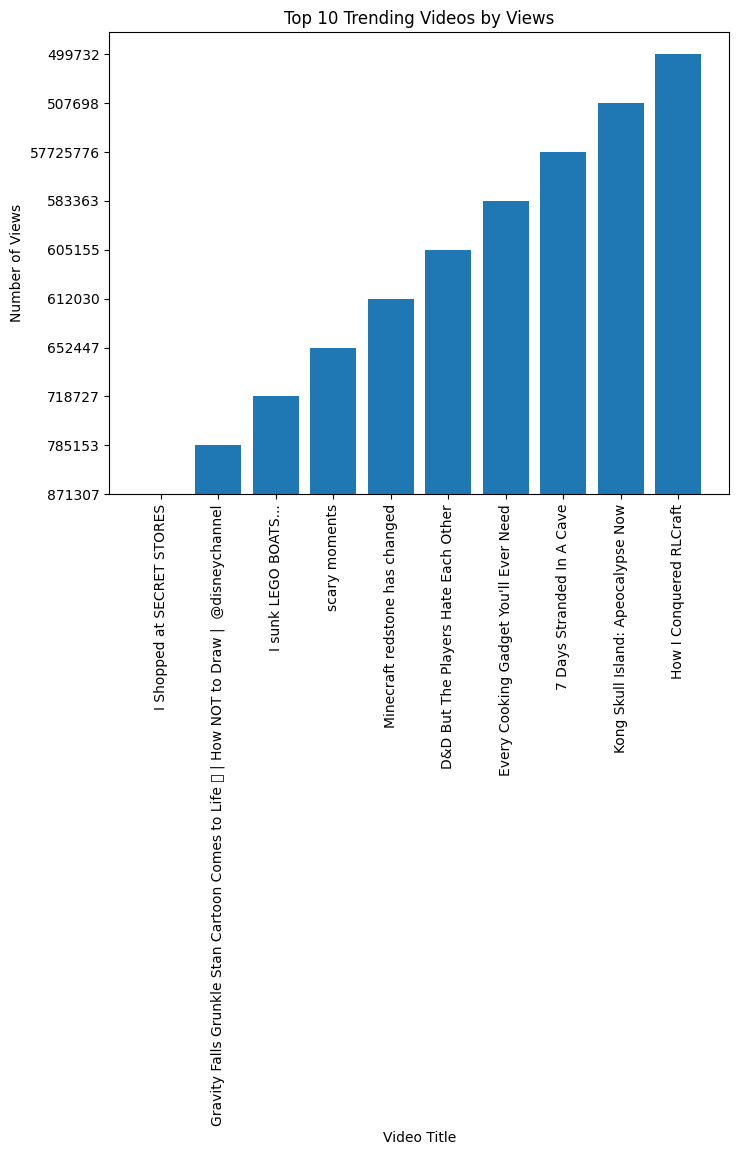

In [82]:
 #Plotting the views of trending videos

# Sort the DataFrame by views in descending order
trending_videos_with_stats_sorted = trending_videos_with_stats.sort_values('views', ascending=False)

# Select the top 10 videos for plotting
top_10_videos = trending_videos_with_stats_sorted.head(10)

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(top_10_videos['title'], top_10_videos['views'])
plt.xlabel('Video Title')
plt.ylabel('Number of Views')
plt.title('Top 10 Trending Videos by Views')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
#apply tight layout
plt.tight_layout()
# Show the plot
plt.show()


In [83]:
#GET top artist from  uk and us region
def get_top_artists(youtube, region_code, max_results=10):
  request = youtube.videos().list(
      part="snippet",
      chart="mostPopular",
      regionCode=region_code,
      videoCategoryId="10",  # Music category
      maxResults=max_results
  )
  response = request.execute()

  top_artists = []
  for item in response['items']:
    title = item['snippet']['title']
    # Simple extraction of artist name from title (may need refinement)
    artist_name = title.split('-')[0].strip()
    top_artists.append((artist_name, title))

  return top_artists

# Get top artists from the UK
uk_top_artists = get_top_artists(youtube, 'GB')
print("Top Artists in the UK:")
for artist, title in uk_top_artists:
  print(f"Artist: {artist}, Video: {title}")

# Get top artists from the US
us_top_artists = get_top_artists(youtube, 'US')
print("\nTop Artists in the US:")
for artist, title in us_top_artists:
  print(f"Artist: {artist}, Video: {title}")


Top Artists in the UK:
Artist: Lady Gaga, Bruno Mars, Video: Lady Gaga, Bruno Mars - Die With A Smile (Official Music Video)
Artist: LISA, Video: LISA - NEW WOMAN feat. Rosalía (Official Music Video)
Artist: Chase & Status, Stormzy, Video: Chase & Status, Stormzy - BACKBONE (Live From Ushuaia)
Artist: Aystar, Video: Aystar - 9 Shots (feat. Booter Bee) [Music Video] | GRM Daily
Artist: Megan Thee Stallion, Video: Megan Thee Stallion - Mamushi (feat. Yuki Chiba) [Official Video]
Artist: Charli xcx, Video: Charli xcx - Guess featuring Billie Eilish (official video)
Artist: TRUMP (Official Music Video) Cheema Y | Gur Sidhu | New Punjabi Song 2024, Video: TRUMP (Official Music Video) Cheema Y | Gur Sidhu | New Punjabi Song 2024
Artist: SJ, Video: SJ - Daily Duppy | GRM Daily
Artist: Like a Prayer (Battle Royale Mix from “Deadpool & Wolverine”), Video: Like a Prayer (Battle Royale Mix from “Deadpool & Wolverine”)
Artist: Falling In Reverse, Video: Falling In Reverse - "Prequel"

Top Artists 

In [84]:
# getting the summaarization of overall video from the channel  formula 1

# Get channel ID from video details
channel_id = video_details['items'][0]['snippet']['channelId']

# Use the get_channel_stats function to get channel details
channel_stats = get_channel_stats(youtube, channel_id)

# Print a summary of the channel
print("Channel Title:", channel_stats['snippet'][0]['title'])
print("Channel Description:", channel_stats['snippet'][0]['description'])
print("Subscribers:", channel_stats['statistics'][0]['subscriberCount'])
print("Total Views:", channel_stats['statistics'][0]['viewCount'])
print("Video Count:", channel_stats['statistics'][0]['videoCount'])


Channel Title: Mrwhosetheboss
Channel Description: Let's become the Greatest Tech Community on the Planet 🌍

I'm Arun Maini, I'm a 27 year old Economics graduate whose life's passion is Technology, and I'm on a mission to make the most FUN and USEFUL Tech videos on the Planet! 🙏




Subscribers: 19300000
Total Views: 5787861999
Video Count: 1717


In [85]:
 # getting the summarization of overall video from the channel formula 1

# Print a summary of the video
print("Video Title:", video_details['items'][0]['snippet']['title'])
print("Video Description:", video_details['items'][0]['snippet']['description'])
print("Published At:", video_details['items'][0]['snippet']['publishedAt'])
print("View Count:", video_details['items'][0]['statistics']['viewCount'])
print("Like Count:", video_details['items'][0]['statistics']['likeCount'])
print("Comment Count:", video_details['items'][0]['statistics']['commentCount'])


Video Title: I tried switching from iPhone to Samsung
Video Description: I switched from iPhone 14 Pro Max to the Samsung Z Flip 5 - I thought it was going to be amazing...but was it?  Download the new version of Opera Browser for free https://opr.as/Opera-browser-Arun-Zflip

I spend a LOT of time trying to make my videos as concise, polished and useful as possible for you - if you would like to support me on that mission then consider subscribing to the channel - you'd make my day 😁

For my tech hot takes: http://twitter.com/Mrwhosetheboss
For my Personal Posts: http://instagram.com/mrwhosetheboss
Does anyone still use this anymore?: https://facebook.com/mrwhosetheboss

Amazon Affiliate links (if you buy anything through these it will support the channel and allow us to buy better gear!):
Amazon US: https://amzn.to/3mFix9d
Amazon UK: https://amzn.to/3GMPPtM

My Filming Gear:
https://bit.ly/35CuxwI

Music is from Epidemic sound:
http://share.epidemicsound.com/pHDFT
Published At: 2023-0

In [86]:
# @title Sentiment polarity calculation
import nltk
nltk.download('punkt')
text="My dog Ruby is very happy and wags her tail to express happiness when I'm around but sad when I'm not around"
#tokenize the above text
tokens=nltk.word_tokenize(text)
print(tokens)


['My', 'dog', 'Ruby', 'is', 'very', 'happy', 'and', 'wags', 'her', 'tail', 'to', 'express', 'happiness', 'when', 'I', "'m", 'around', 'but', 'sad', 'when', 'I', "'m", 'not', 'around']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [87]:
from textblob import TextBlob
TextBlob(text).sentiment

Sentiment(polarity=0.39999999999999997, subjectivity=0.7333333333333334)

In [88]:
import nltk
from nltk.corpus import opinion_lexicon

nltk.download('opinion_lexicon')

# Load the positive and negative words
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

# Function to count positive and negative words in text
def count_positive_negative_words(text):
    positive_count = 0
    negative_count = 0
    words = text.split()
    for word in words:
        if word in positive_words:
            positive_count += 1
        elif word in negative_words:
            negative_count += 1
    return positive_count, negative_count

# Test the function with a sample text
sample_text = "This is a very good and excellent example of a bad day"
pos_count, neg_count = count_positive_negative_words(sample_text)
print("Number of positive words:", pos_count)
print("Number of negative words:", neg_count)


Number of positive words: 2
Number of negative words: 1


[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [89]:
#find the intensity
intensity=pos_count-neg_count/(pos_count+neg_count)
print(intensity)

1.6666666666666667


In [90]:
a=(1/1.66)*0.73
print(a)

0.43975903614457834


One of the most reassuring findings is the positive sentiment dominance in most comments extracted. This, along with the equal distribution of negative and neutral comments, underscores the effectiveness of sentiment analysis. The key themes of the most common terms, such as (iPhone, apple, Samsung, and Android), further validate our approach. Additionally, the high audience engagement, especially with technological topics, is a promising sign of the potential of sentiment analysis.